In [ ]:
!pip install yfinance
''' We are using yahoo finance dataset because it has a lot of data'''

' We are using yahoo finance dataset because it has a lot of data'

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
#standard data manipulation libraries
from pandas_datareader import data as pdr
#useful for pulling data from yfinance
from sklearn import linear_model
import statsmodels.api as sm
import yfinance as yf

In [ ]:
yf.Ticker("AAPL").history(start = "2023-01-01", end = "2023-01-04")


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,129.555841,130.17239,123.479803,124.374802,112117500,0.0,0.0


In [ ]:
ticker_list = 'TGT TSLA F GM  MSFT ETSY SPOT NVDA AMD META BABA PYPL NFLX SQ CRM XOM TEAM TWLO V UNH JPM SBUX ADBE BA NIO BAC PANW SNOW COP PDD CVX AVGO FIS EL MRNA QCOM WFC HD INTC OXY ENPH PFE INTU GS CAT NKE DIS TMUS TXN LLY MU CRWD MA NOW LRCX SHOP CVX AMGN JNJ CMCSA MCD DKNG SLB MRK TMO BILL CSCO ROKU HON HUM NET AMAT PG DHR T ADI CI MCHP SCHW PEP LMT WMT C WDAY VZ ACN BMY MRVL DDOG MNST EXP GM ILMN MRO KO IBM PNC ORCL ZS DOW ANET ADSK PLTR FSLR MAR AXP HAL CCL MDB FTNT UAL RTX BIDU VLO AAL UPS RCL HPQ PGR TJX LVS ADP CNC YUM GD OKTA PINS LULU DAL DPZ ATVI SNAP ZM EBAY AEP CL EA SNPS MGM MTCH WB TTWO PAYC LCID DOCU ZI BILI PLUG K COF SPLK CHWY PTON BURL LUV Z LYFT AKAM UBER'.split()
ticker_list = tuple(ticker_list)
#These are a list of stocks that we are looking at

In [ ]:
start = dt.date.today() - dt.timedelta(days = int(365.25*1.5))
mid = dt.date.today() - dt.timedelta(days = int(365.25*0.5))
end = dt.date.today()
#We are doing time series analysis, based on difference between start and end

In [ ]:
print(start, mid, end)

2022-05-15 2023-05-15 2023-11-13


In [ ]:
yf.__version__

'0.2.31'

In [ ]:
dataset = yf.download(list(ticker_list), start=start, end=mid)

[*********************100%%**********************]  157 of 157 completed


In [ ]:
data = dataset

In [ ]:
dataset = data['Adj Close']
"""the pdr get_data_yahoo function pulls yahoo finance data for all the stocks in ticker_list from start to mid.
the returned columns are Open, High, Low, Adj Close, Close, and Volume."""


stocks_returns = np.log(dataset/dataset.shift(1))
print(stocks_returns)

"""
This accounts for the inherent asymmetry that stocks can only go down 100% but can go up
unlimited amounts. In other words, it rescales [-100, infinity] to [-infinity, infinity]"""
corr_matrix = stocks_returns.corr()
print(corr_matrix)

"""
The .corr() function calculates the correlation between two time series
For this case, we'll take the pairwise correlations between every pair of
stocks and use the highest pairs as candidates for cointegration.
"""

                 AAL       ACN      ADBE       ADI       ADP      ADSK  \
Date                                                                     
2022-05-16       NaN       NaN       NaN       NaN       NaN       NaN   
2022-05-17  0.073935  0.016978  0.016714  0.039846  0.030033  0.015765   
2022-05-18 -0.053600 -0.059852 -0.029153 -0.024217 -0.030513 -0.039941   
2022-05-19 -0.008323 -0.002008 -0.008836  0.006358 -0.007945  0.030078   
2022-05-20 -0.029690  0.011049  0.011872  0.009277  0.008616 -0.011996   
...              ...       ...       ...       ...       ...       ...   
2023-05-08  0.034718 -0.003129 -0.012535  0.006143 -0.005631 -0.015249   
2023-05-09  0.007631 -0.005073 -0.004107 -0.026914 -0.002851  0.003847   
2023-05-10 -0.009025  0.020325  0.003990  0.010026  0.006299  0.018456   
2023-05-11 -0.019008  0.012492 -0.007118 -0.004641 -0.024482 -0.016538   
2023-05-12 -0.003560  0.017909 -0.018109 -0.000111  0.013868  0.006967   

                 AEP      AKAM      A

"\nThe .corr() function calculates the correlation between two time series\nFor this case, we'll take the pairwise correlations between every pair of\nstocks and use the highest pairs as candidates for cointegration.\n"

In [ ]:
processed_corr = corr_matrix.mask(np.tril(np.ones(corr_matrix.shape)).astype(bool))
#Set diagonal elements and lower triangular elements to nans
#Serves to remove duplicates and 1-correlations between an element and itself
s =  processed_corr.unstack()
#Reshapes the correlation matrix into a list of ((row, column), correlation value) pairs
so = s.sort_values(kind="quicksort", ascending = False)
#Sort the pairs by correlation value
display(so[:30])

LRCX  AMAT    0.930455
V     MA      0.908841
MCHP  ADI     0.904249
UAL   AAL     0.904211
XOM   CVX     0.900568
SLB   HAL     0.900389
DAL   AAL     0.889642
MRO   COP     0.889620
TMO   DHR     0.885591
RCL   CCL     0.882802
UAL   DAL     0.881507
XOM   COP     0.879123
CVX   COP     0.871931
TXN   MCHP    0.869871
MRO   HAL     0.867678
MCHP  AMAT    0.865956
XOM   MRO     0.865092
JPM   BAC     0.863231
TXN   ADI     0.860883
GM    F       0.859661
MRO   CVX     0.859620
WFC   BAC     0.858507
NVDA  AMD     0.853575
      MRVL    0.850188
PEP   KO      0.847536
XOM   HAL     0.844516
MRVL  MCHP    0.839010
TXN   AMAT    0.838939
HAL   COP     0.837478
MDB   DDOG    0.834287
dtype: float64

In [ ]:
print(s)

AAL  AAL          NaN
     ACN          NaN
     ADBE         NaN
     ADI          NaN
     ADP          NaN
               ...   
ZS   YUM     0.317827
     Z       0.511734
     ZI      0.624903
     ZM      0.585639
     ZS           NaN
Length: 24649, dtype: float64


Based on the Results, LRCX and AMAT have the highest correlation.

In [ ]:
correlations_with_AMAT = processed_corr.loc['AMAT']

In [ ]:
correlations_with_AMAT.sort_values(inplace = True, ascending = False)
print(correlations_with_AMAT[:15])

LRCX    0.930455
MCHP    0.865956
TXN     0.838939
MRVL    0.829167
AVGO    0.809508
NVDA    0.809047
AMD     0.799795
QCOM    0.791421
MU      0.751416
HPQ     0.750207
INTC    0.730035
MA      0.716003
SNPS    0.693064
INTU    0.679708
SQ      0.658263
Name: AMAT, dtype: float64


In [ ]:
stocks = yf.download(['LRCX', 'TXN', 'AVGO', 'NVDA', 'AMAT'], start, mid)['Adj Close']
# Pull data for closes
stocks['LRCX_1d_return'] = np.log(stocks['LRCX']/stocks['LRCX'].shift(1))
stocks['AMAT_1d_return'] = np.log(stocks['AMAT']/stocks['AMAT'].shift(1))
# Calculate daily returns

[*********************100%%**********************]  5 of 5 completed


In [ ]:
print(stocks)

                  AMAT        AVGO        LRCX        NVDA         TXN  \
Date                                                                     
2022-05-16  108.888733  558.239868  472.755524  172.446747  161.020569   
2022-05-17  115.157127  582.651489  501.955536  181.566528  167.212906   
2022-05-18  109.736343  546.647217  467.865936  169.190414  162.740677   
2022-05-19  109.144981  523.308594  462.623688  171.048340  160.179611   
2022-05-20  104.926643  520.415161  464.573608  166.753143  162.272400   
...                ...         ...         ...         ...         ...   
2023-05-08  115.202583  622.336914  523.758789  291.455841  161.592957   
2023-05-09  113.301613  611.899658  512.802246  285.656891  160.392456   
2023-05-10  114.864197  619.576782  524.265869  288.796326  160.441666   
2023-05-11  114.913948  620.961731  524.444824  285.726898  158.591751   
2023-05-12  115.540970  624.404602  524.067017  283.347321  159.290390   

            LRCX_1d_return  AMAT_1d_r

In [ ]:
import numpy as np

stocks.dropna(inplace = True)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = stocks[['LRCX']]
y = stocks[['AMAT']]
model = LinearRegression()
model.fit(X, y)
print(model.coef_, model.intercept_)
predicted_Y = model.predict(X)
mse = mean_squared_error(y, predicted_Y)
print(f"Mean Squared Error: {mse}")
#Simple baseline linear regression

[[0.22819864]] [-0.77275024]
Mean Squared Error: 16.056440833495206


In [ ]:
from sklearn.metrics import r2_score
r2 = model.score(X, y)
print(r2)

0.8897257388576907


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = stocks[['LRCX', 'TXN', 'AVGO', 'NVDA']]
y = stocks[['AMAT']]
model2 = LinearRegression()
model2.fit(X, y)
print(model2.coef_, model2.intercept_)
predicted_Y = model2.predict(X)
mse = mean_squared_error(y, predicted_Y)
print(f"Mean Squared Error: {mse}")
#Simple baseline linear regression

[[ 0.1308858   0.15913377  0.09511888 -0.02897233]] [-27.99797296]
Mean Squared Error: 7.302853829928036


In [ ]:
end_stocks = yf.download(['LRCX', 'TXN', 'AVGO', 'NVDA', 'AMAT'], mid, end)['Adj Close']


[*********************100%%**********************]  5 of 5 completed


In [ ]:
pred_end_y = model.predict(end_stocks[['LRCX']])
mse = mean_squared_error(end_stocks['AMAT'], pred_end_y)
print("Mean Squared Error of simple linear regression is " + str(mse))

Mean Squared Error of simple linear regression is 26.86718459251362


In [ ]:
r2 = model.score(end_stocks[['LRCX']], end_stocks['AMAT'])
print(r2)

0.42104703490212203


In [ ]:
pred_end_y = model2.predict(end_stocks[['LRCX', 'TXN', 'AVGO', 'NVDA']])
mse = mean_squared_error(end_stocks['AMAT'], pred_end_y)
print("Mean Squared Error of linear regression with multiple variables is " + str(mse))

Mean Squared Error of linear regression with multiple variables is 97.08240474008137


In [ ]:
r2 = model2.score(end_stocks[['LRCX', 'TXN', 'AVGO', 'NVDA']], end_stocks['AMAT'])
print(r2)

-1.0919998479767732


In [ ]:

thresh = 0.8
#hyperparameter
flag_buy = (((stocks['LRCX_1d_return']) / stocks['LRCX_1d_return'].std() - (stocks['AMAT_1d_return']) / stocks['AMAT_1d_return'].std()) > thresh).astype(int)
flag_sell = (((stocks['LRCX_1d_return']) / stocks['LRCX_1d_return'].std() - (stocks['AMAT_1d_return']) / stocks['AMAT_1d_return'].std()) < -thresh).astype(int)
# Integer flags for when to buy/sell AMAT -- buy when LRCX goes up >0.8 stdevs more than AMAT or LRCX goes down 0.8 stdevs more than AMAT
flag = flag_buy - flag_sell
profs = flag.shift() * stocks['AMAT_1d_return']
#Calculate daily profits as position * return

In [ ]:
flag

Date
2022-05-13    0
2022-05-16    0
2022-05-17    0
2022-05-18    0
2022-05-19    0
             ..
2023-05-08    0
2023-05-09    0
2023-05-10    0
2023-05-11    0
2023-05-12    0
Length: 251, dtype: int64

In [ ]:
profs.sum()

0.26166715749329683

In [ ]:
profs[profs!=0].mean() / (profs[profs!=0].std() * abs(flag).sum()**(-1/2))
#Filter to places where daily profit isn't 0 (so a trade was made) and do a t-test

4.163355415127164

<Axes: xlabel='Date'>

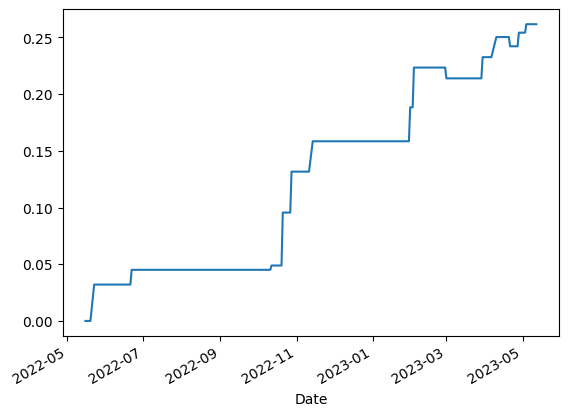

In [ ]:
profs.cumsum().plot()
#cumulative sum of returns over time == PNL

[*********************100%%**********************]  2 of 2 completed
0.26166709409966593
4.1633577819450736


<Axes: xlabel='Date'>

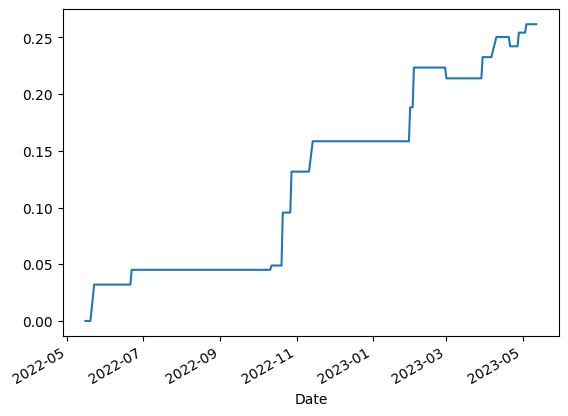

In [ ]:
stocks = yf.download(['LRCX', 'AMAT'], start, mid)['Adj Close']
# Pull data for closes
stocks['LRCX_1d_return'] = np.log(stocks['LRCX']/stocks['LRCX'].shift(1))
stocks['AMAT_1d_return'] = np.log(stocks['AMAT']/stocks['AMAT'].shift(1))
# Calculate daily returns
thresh =0.8
#hyperparameter
flag_buy = (((stocks['LRCX_1d_return']) / stocks['LRCX_1d_return'].std() - (stocks['AMAT_1d_return']) / stocks['AMAT_1d_return'].std()) > thresh).astype(int)
flag_sell = (((stocks['LRCX_1d_return']) / stocks['LRCX_1d_return'].std() - (stocks['AMAT_1d_return']) / stocks['AMAT_1d_return'].std()) < -thresh).astype(int)
# Integer flags for when to buy/sell AMAT -- buy when LRCX goes up >0.8 stdevs more than AMAT or LRCX goes down 0.8 stdevs more than AMAT
flag = flag_buy - flag_sell
profs = flag.shift() * stocks['AMAT_1d_return']
#Calculate daily profits as position * return
print(profs.sum())
#Sum of total returns -- pretty good
print(profs[profs!=0].mean() / (profs[profs!=0].std() * abs(flag).sum()**(-1/2)))
#Filter to places where daily profit isn't 0 (so a trade was made) and do a t-test
profs.cumsum().plot()
#cumulative sum of returns over time == PNL
#Still profitable, but much less impressive

In [ ]:
stocks = yf.download(['LRCX', 'AMAT'], start, mid)[['Adj Close', 'Open']]

"""
We'll try something that has a better chance of actually being a trade -- mean reversion
based on open/close prices. In the trade before, you always just get outcompeted by the
firm that trades fastest before 4. In this one, you reasonably have a chance to get your trade
"""

[*********************100%%**********************]  2 of 2 completed


"\nWe'll try something that has a better chance of actually being a trade -- mean reversion\nbased on open/close prices. In the trade before, you always just get outcompeted by the\nfirm that trades fastest before 4. In this one, you reasonably have a chance to get your trade\n"

In [ ]:
stocks

Adj Close                    Open            
                  AMAT        LRCX        AMAT        LRCX
Date                                                      
2022-05-13  110.248848  482.015198  108.190002  465.600006
2022-05-16  108.888741  472.755493  109.610001  486.420013
2022-05-17  115.157127  501.955505  114.540001  495.019989
2022-05-18  109.736343  467.865997  113.989998  500.519989
2022-05-19  109.144989  462.623749  111.410004  479.500000
...                ...         ...         ...         ...
2023-05-08  115.202583  523.758789  116.870003  530.000000
2023-05-09  113.301613  512.802246  114.080002  519.580017
2023-05-10  114.864197  524.265869  115.519997  524.119995
2023-05-11  114.913956  524.444824  115.300003  528.440002
2023-05-12  115.540970  524.066956  116.709999  530.000000

[251 rows x 4 columns]

10.477389624637249


'\nobviously this procedure has some error lol\nfind the bug! this is lowk a pandas q\n'

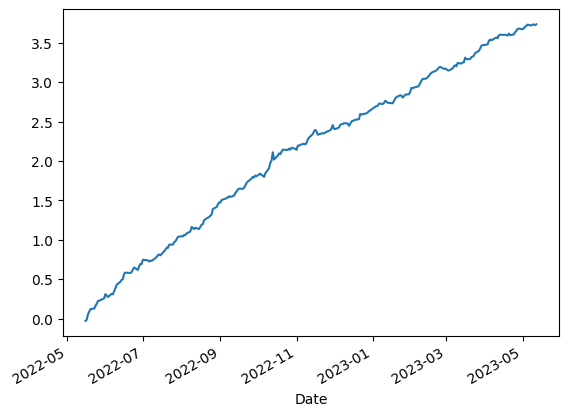

In [ ]:
flag_lrcx = -np.sign(np.log((stocks['Open']['LRCX'].shift() / stocks['Adj Close']['LRCX'])))
tot = flag_lrcx * np.log(stocks['Adj Close']['LRCX'] / stocks['Open']['LRCX'])
print(tot.mean() / (tot.std() * (len(tot)**(-1/2))))
tot.cumsum().plot()
"""
obviously this procedure has some error lol
find the bug! this is lowk a pandas q
"""

In [ ]:
lrcx_gaps = np.log((stocks['Open']['LRCX'] / stocks['Adj Close']['LRCX'].shift()))
amat_gaps = np.log((stocks['Open']['AMAT'] / stocks['Adj Close']['AMAT'].shift()))
#Calculate "gap" -- change from yesterday's close to today's open
flag = np.sign((lrcx_gaps / lrcx_gaps.std()) - (amat_gaps / amat_gaps.std()) )
#Flag -- increase / decrease
profs = flag * np.log(stocks['Adj Close']['AMAT'] / stocks['Open']['AMAT'])

In [ ]:
(profs.mean() / (profs.std() * len(profs)**(-1/2)))

-2.1041264468679466

<Axes: xlabel='Date'>

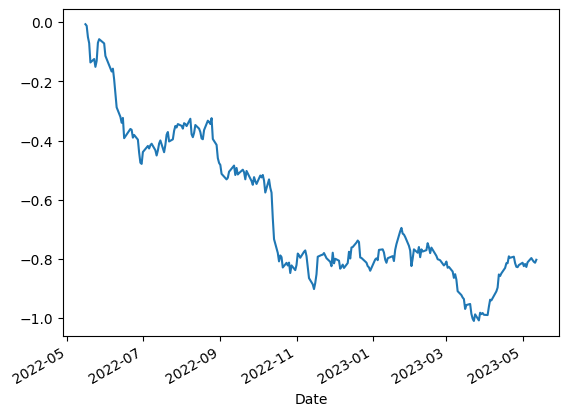

In [ ]:
profs.cumsum().plot()
#this looks really ass

In [ ]:
profs_lrcx = -flag * np.log(stocks['Adj Close']['LRCX'] / stocks['Open']['LRCX'])
print(profs_lrcx.mean()* len(profs_lrcx)**(0.5) / profs_lrcx.std())

4.506302941099422


<Axes: xlabel='Date'>

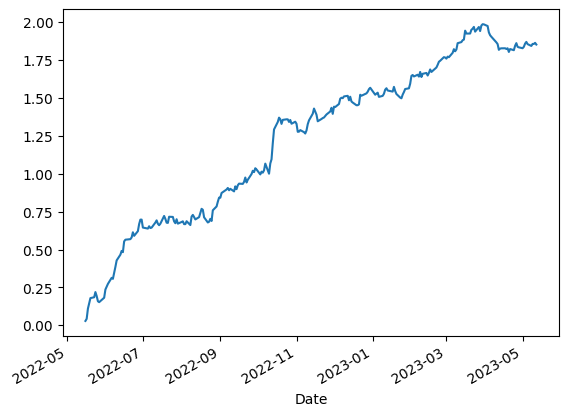

In [ ]:
profs_lrcx.cumsum().plot()
#pretty good...

In [ ]:
profs = flag * np.log(stocks['Adj Close']['AMAT'] / stocks['Open']['AMAT']) - flag * np.log(stocks['Adj Close']['LRCX'] / stocks['Open']['LRCX'])
print(profs.mean()* len(profs)**(0.5) / profs.std())

6.259311773297821


<Axes: xlabel='Date'>

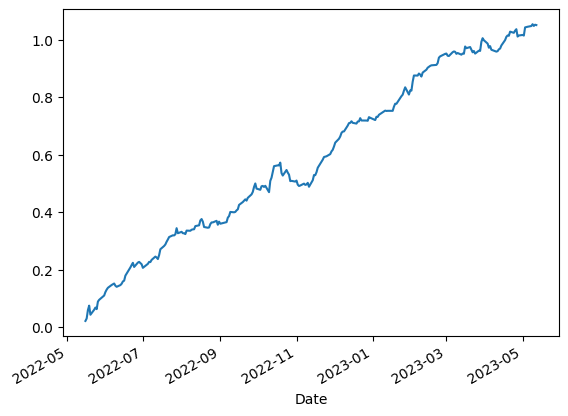

In [ ]:
profs.cumsum().plot()
#up and to the right!!! how do we get a higher t-stat by combining a "good" strategy with a "bad" strategy?

[*********************100%%**********************]  2 of 2 completed
1.8336165594682914


<Axes: xlabel='Date'>

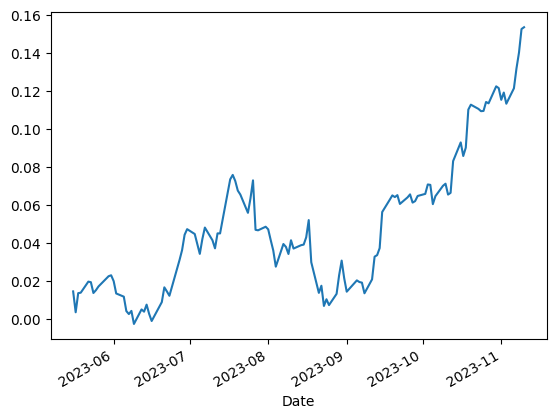

In [ ]:
stocks = yf.download(['LRCX', 'AMAT'], mid, end)[['Close', 'Open']]
lrcx_gaps = np.log((stocks['Open']['LRCX'] / stocks['Close']['LRCX'].shift()))
amat_gaps = np.log((stocks['Open']['AMAT'] / stocks['Close']['AMAT'].shift()))
flag = np.sign((lrcx_gaps / lrcx_gaps.std()) - (amat_gaps / amat_gaps.std()) )
profs = flag * np.log(stocks['Close']['AMAT'] / stocks['Open']['AMAT']) - flag * np.log(stocks['Close']['LRCX'] / stocks['Open']['LRCX'])
print(profs.mean()* len(profs)**(0.5) / profs.std())
profs.cumsum().plot()